In [2]:
# samples from normal dist

import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

X = np.random.randn(1000)
p = sns.distplot(X, bins=30).get_figure()
p.savefig('./figures/bootstrap_unimodal.png')

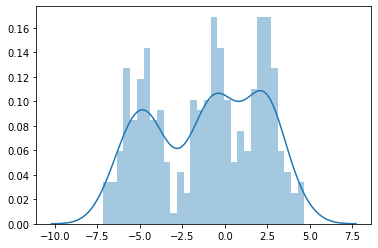

In [3]:
# bootstrap sampling

def generate_samples(n_samples=100, n_modes=3, seed=0):
    np.random.seed(seed)
    means = (np.random.random_sample(n_modes) - 0.5) * 10
    X = np.concatenate([np.random.randn(n_samples) + m for m in means])
    labels = np.array([c for c in range(n_modes) for _ in range(n_samples)], dtype=np.int)
    return X, labels

X, labels = generate_samples(seed=1)
p = sns.distplot(X, bins=30).get_figure()
p.savefig('./figures/bootstrap_multimodal.png')

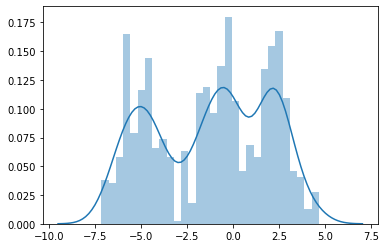

In [4]:
def bootstrap_sampling(X, n_samples):
    indices = np.random.randint(0, X.shape[0], (n_samples,))
    return X[indices]

B = bootstrap_sampling(X, n_samples=1000)
p = sns.distplot(B, bins=30).get_figure()
p.savefig('./figures/bootstrap_multimodal_resampling.png')

In [5]:
def confidence_interval_with_bootstrap(X, n_bootstrap=1000, p_value=0.05):
    B = bootstrap_sampling(X, n_bootstrap)
    B.sort()
    n_outs = int(X.shape[0] * p_value / 2)
    lower, upper = B[n_outs], B[-n_outs]
    return lower, upper

p_value = 0.05
l, u = confidence_interval_with_bootstrap(X)
print(f'Confidence interval (p-value={p_value}) = {l:.4}, {u:.4}')

Confidence interval (p-value=0.05) = -7.096, 4.588


In [6]:
from bokeh.plotting import output_notebook, show
from ensemble_utils import scatterplot_2class
from ensemble_utils import draw_activate_image
from soydata.data.classification import make_moons

output_notebook()

X, labels = make_moons(n_samples=500, xy_ratio=2.0, x_gap=-0.2, y_gap=-0.15, noise=0.1, seed=0)
p = scatterplot_2class(X, labels)
show(p)

Loading BokehJS ...

In [7]:
from sklearn.tree import DecisionTreeClassifier

def prepare_elements(model, X, labels):
    score = model.predict_proba(X)
    score = score[:,1] - score[:,0]
    pred = model.predict(X)    
    accuracy = (pred == labels).sum() / labels.shape[0]
    return score, accuracy

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X, labels)

score, accuracy = prepare_elements(dt, X, labels)
title = f'Decision Tree. accuracy={accuracy:.4}'
p = draw_activate_image(dt, X, use_score=True, resolution=100, title=title, height=400, width=400)
p = scatterplot_2class(X, labels, score=score, p=p)
show(p)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from bokeh.layouts import gridplot
from bokeh.io import save

for depth in [4, None]:
    figures = []

    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, oob_score=True)
    rf.fit(X, labels)

    score, accuracy = prepare_elements(rf, X, labels)
    title = f'Random Forest (max depth={depth}). accuracy={accuracy:.4}'
    p = draw_activate_image(rf, X, use_score=True, resolution=100, height=400, width=400, title=title)
    p = scatterplot_2class(X, labels, score=score, p=p)
    figures.append(p)

    for dt in rf.estimators_[:5]:
        score, accuracy = prepare_elements(dt, X, labels)
        title = f'Decision Tree. accuracy={accuracy:.4}'
        p = draw_activate_image(dt, X, use_score=True, resolution=100, height=400, width=400, title=title)
        p = scatterplot_2class(X, labels, score=score, p=p)
        figures.append(p)

    gp = gridplot([figures[:3], figures[3:]])
    show(gp)
    save(gp, f'./figures/random_forest_moon_depth_{depth}.html')

In [10]:
rf.oob_score_

0.966

In [11]:
rf.feature_importances_

array([0.47604966, 0.52395034])

In [13]:
figures = []

title = f'Classification of Random Forest'
p = draw_activate_image(rf, X, score_type='prediction', use_score=True, resolution=100, height=400, width=400, title=title)
p = scatterplot_2class(X, labels, score=score, p=p)
figures.append(p)

title = f'Variance of prediction p(1-p)'
p = draw_activate_image(rf, X, score_type='var', use_score=True, resolution=100, height=400, width=400, title=title)
p = scatterplot_2class(X, labels, score=score, p=p, colormap=['grey', 'grey'])
figures.append(p)

gp = gridplot([figures[:2]])
_ = save(gp, './figures/random_forest_moon_variance.html')

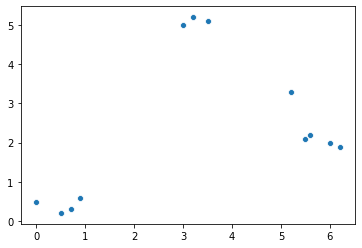

In [15]:
x = np.array([0,   0.5, 0.7, 0.9, 3.0, 3.2, 3.5, 5.2, 5.5, 5.6, 6.0, 6.2])
y = np.array([0.5, 0.2, 0.3, 0.6, 5.0, 5.2, 5.1, 3.3, 2.1, 2.2, 2.0, 1.9])

sns.scatterplot(x, y)

In [16]:
x

array([0. , 0.5, 0.7, 0.9, 3. , 3.2, 3.5, 5.2, 5.5, 5.6, 6. , 6.2])